<a href="https://colab.research.google.com/github/prathameshhire/Happiness-Prediction/blob/main/Happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Happiness Index

## Features

**Country name:** name of the country

**Year:** year data was collected

**Life ladder:** information about how happy people are

**Log GDP per capita:** market values of goods and services in a country

**Social support:** how people feel they are supported by those around them

**Healthy life expectancy:** rank of the country based on the happiness score

**Freedom to make life choices:** how much freedom contributes to one’s feeling of happiness

**Generosity:** have you donated money

**Perceptions of corruption:** how do people perceive that there is corruption

**Positive affect:** do you feel happiness, laughter and enjoyment?

**Negative affect:** do you feel worry, anger or sadness?

In [ ]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_classification

In [ ]:
data = pd.read_csv('happiness_data.csv')

## Question A

### Answers



1) How much data is present?

-> 1949 rows including column names and 11 columns

2) What attributes/features are continuous valued?

-> Continuous


* Life Ladder (happiness score)
* Log GDP per capita
* Social support
* Healthy life expectancy at birth
* Freedom to make life choices
* Generosity
* Perceptions of corruption
* Positive affect
* Negative affect

-> Categorical
* Year
* Country

3) Data Summary

-> [In Code Cell below]

### Code

In [ ]:
data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [ ]:
# Get the number of rows and columns
num_rows, num_columns = data.shape

# Get a statistical summary of the numerical columns
data_summary = data.describe(include='all')

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print("\nStatistical Summary:")
print(data_summary)

Number of rows: 1949
Number of columns: 11

Statistical Summary:
       Country name         year  Life Ladder  Log GDP per capita  \
count          1949  1949.000000  1949.000000         1913.000000   
unique          166          NaN          NaN                 NaN   
top        Zimbabwe          NaN          NaN                 NaN   
freq             15          NaN          NaN                 NaN   
mean            NaN  2013.216008     5.466705            9.368453   
std             NaN     4.166828     1.115711            1.154084   
min             NaN  2005.000000     2.375000            6.635000   
25%             NaN  2010.000000     4.640000            8.464000   
50%             NaN  2013.000000     5.386000            9.460000   
75%             NaN  2017.000000     6.283000           10.353000   
max             NaN  2020.000000     8.019000           11.648000   

        Social support  Healthy life expectancy at birth  \
count      1936.000000                       1

## Question B

### Answers



1) Explain noticeable traits for key attributes

* Year: The data spans from 2005 to 2020, with a mean year of 2013.
* Life Ladder: This is likely the main happiness score.
  1. Range: 2.375 to 8.019
  2. Mean: 5.467
  3. Distribution: Roughly normal, slightly right-skewed
* Log GDP per capita:
  1. Range: 6.635 to 11.648
  2. Mean: 9.368
  3. Distribution: Bimodal, suggesting two distinct groups of countries
* Social support:
  1. Range: 0.29 to 0.987
  2. Mean: 0.813
  3. Distribution: Left-skewed, with most countries having high social support
* Healthy life expectancy at birth:
  1. Range: 32.3 to 77.1 years
  2. Mean: 63.359 years
  3. Distribution: Slightly left-skewed
* Freedom to make life choices:
  1. Range: 0.258 to 0.985
  2. Mean: 0.743
  3. Distribution: Left-skewed, most countries have high freedom scores
* Generosity:
  1. Range: -0.335 to 0.698
  2. Mean: 0.000103
  3. Distribution: Roughly normal, centered around zero
* Perceptions of corruption:
  1. Range: 0.035 to 0.983
  2. Mean: 0.747
  3. Distribution: Left-skewed, most countries have high corruption perception
* Positive affect:
  1. Range: 0.322 to 0.944
  2. Mean: 0.710
  3. Distribution: Left-skewed
* Negative affect:
  1. Range: 0.083 to 0.705
  2. Mean: 0.269
  3. Distribution: Right-skewed, most countries have low negative affect

2) Are there any attributes that might require special treatment? If so, what special treatment might they require?

->  Several attributes have missing values, which might require special treatment:
* Perceptions of corruption: 110 missing values
* Generosity: 89 missing values
* Healthy life expectancy at birth: 55 missing values
* Log GDP per capita: 36 missing values

These missing values should be addressed through imputation techniques or by carefully considering their impact on analyses.

author ~ askadam:

for column 'year':

*   Noticeable Traits:
The data is relatively uniform from 2006 - 2018, having similar density for each year. There is a spike in 2020, hence an outlier.

*   Special Treatments:
Data normalisation required as outlier present in the 2020.

For column 'Life Ladder': Happiness score
*   Noticeable Traits:
Almost normal distribution which has center around 5 and is slightly skewed to the right.

*   Special Treatments:
No special treatments required.

For column 'Log GDP per capita': Market values of goods and services in a country
*   Noticeable Traits:
Bimodal distribution with peaks as 9 and 11.
*   Special Treatments:
Clustering analysis can be useful for distinguishing between two distinct groups within the distribution and used for noise reduction.

For column 'Social support': How people feel they are supported by those around them
*   Noticeable Traits:
Data is left skewed with majority values between 0.8 to 1.0
*   Special Treatments:
Logarithmic or Square root transformations required to normalise the distribution if required.

For column 'Healthy life expectancy at birth': Rank of the country based on the happiness score
Data is left skewed with peak value in 65
*   Special Treatments:
Logarithmic or Square root transformations required to normalise the distribution if required.

For column 'Freedom to make life choices': How much freedom contributes to one's feeling of happiness
*   Noticeable Traits:
Left-skewed distribution with a peak around 0.8
*   Special Treatments:
Logarithmic or Square root transformations required to normalise the distribution if required.

For column 'Generosity': Reflects whether people have donated money
*   Noticeable Traits:
Right-skewed distribution, most values in 0 to 0.1.
*   Special Treatments:
Logarithmic or Square root transformations required to normalise the distribution if required.

For column 'Perceptions of corruption': How people perceive the presence of corruption
*   Noticeable Traits:
Data is left skewed with majority values between 0.8 to 1.0
*   Special Treatments:
Logarithmic or Square root transformations required to normalise the distribution if required.

For column 'Positive affect': Feelings of happiness, laughter, and enjoyment
*   Noticeable Traits:
Data is left skewed with majority values between 0.7 to 0.9
*   Special Treatments:
Logarithmic or Square root transformations required to normalise the distribution if required.

For column 'Negative affect': Feelings of worry, anger, or sadness
*   Noticeable Traits:
Data is right skewed with majority values between 0.1 to 0.3
*   Special Treatments:
Logarithmic or Square root transformations required to normalise the distribution if required.

Several attributes have missing values, which might require special treatment:

Perceptions of corruption: 110 missing values
Generosity: 89 missing values
Healthy life expectancy at birth: 55 missing values
Log GDP per capita: 36 missing values
These missing values should be addressed through imputation techniques or by carefully considering their impact on analyses.

### Code

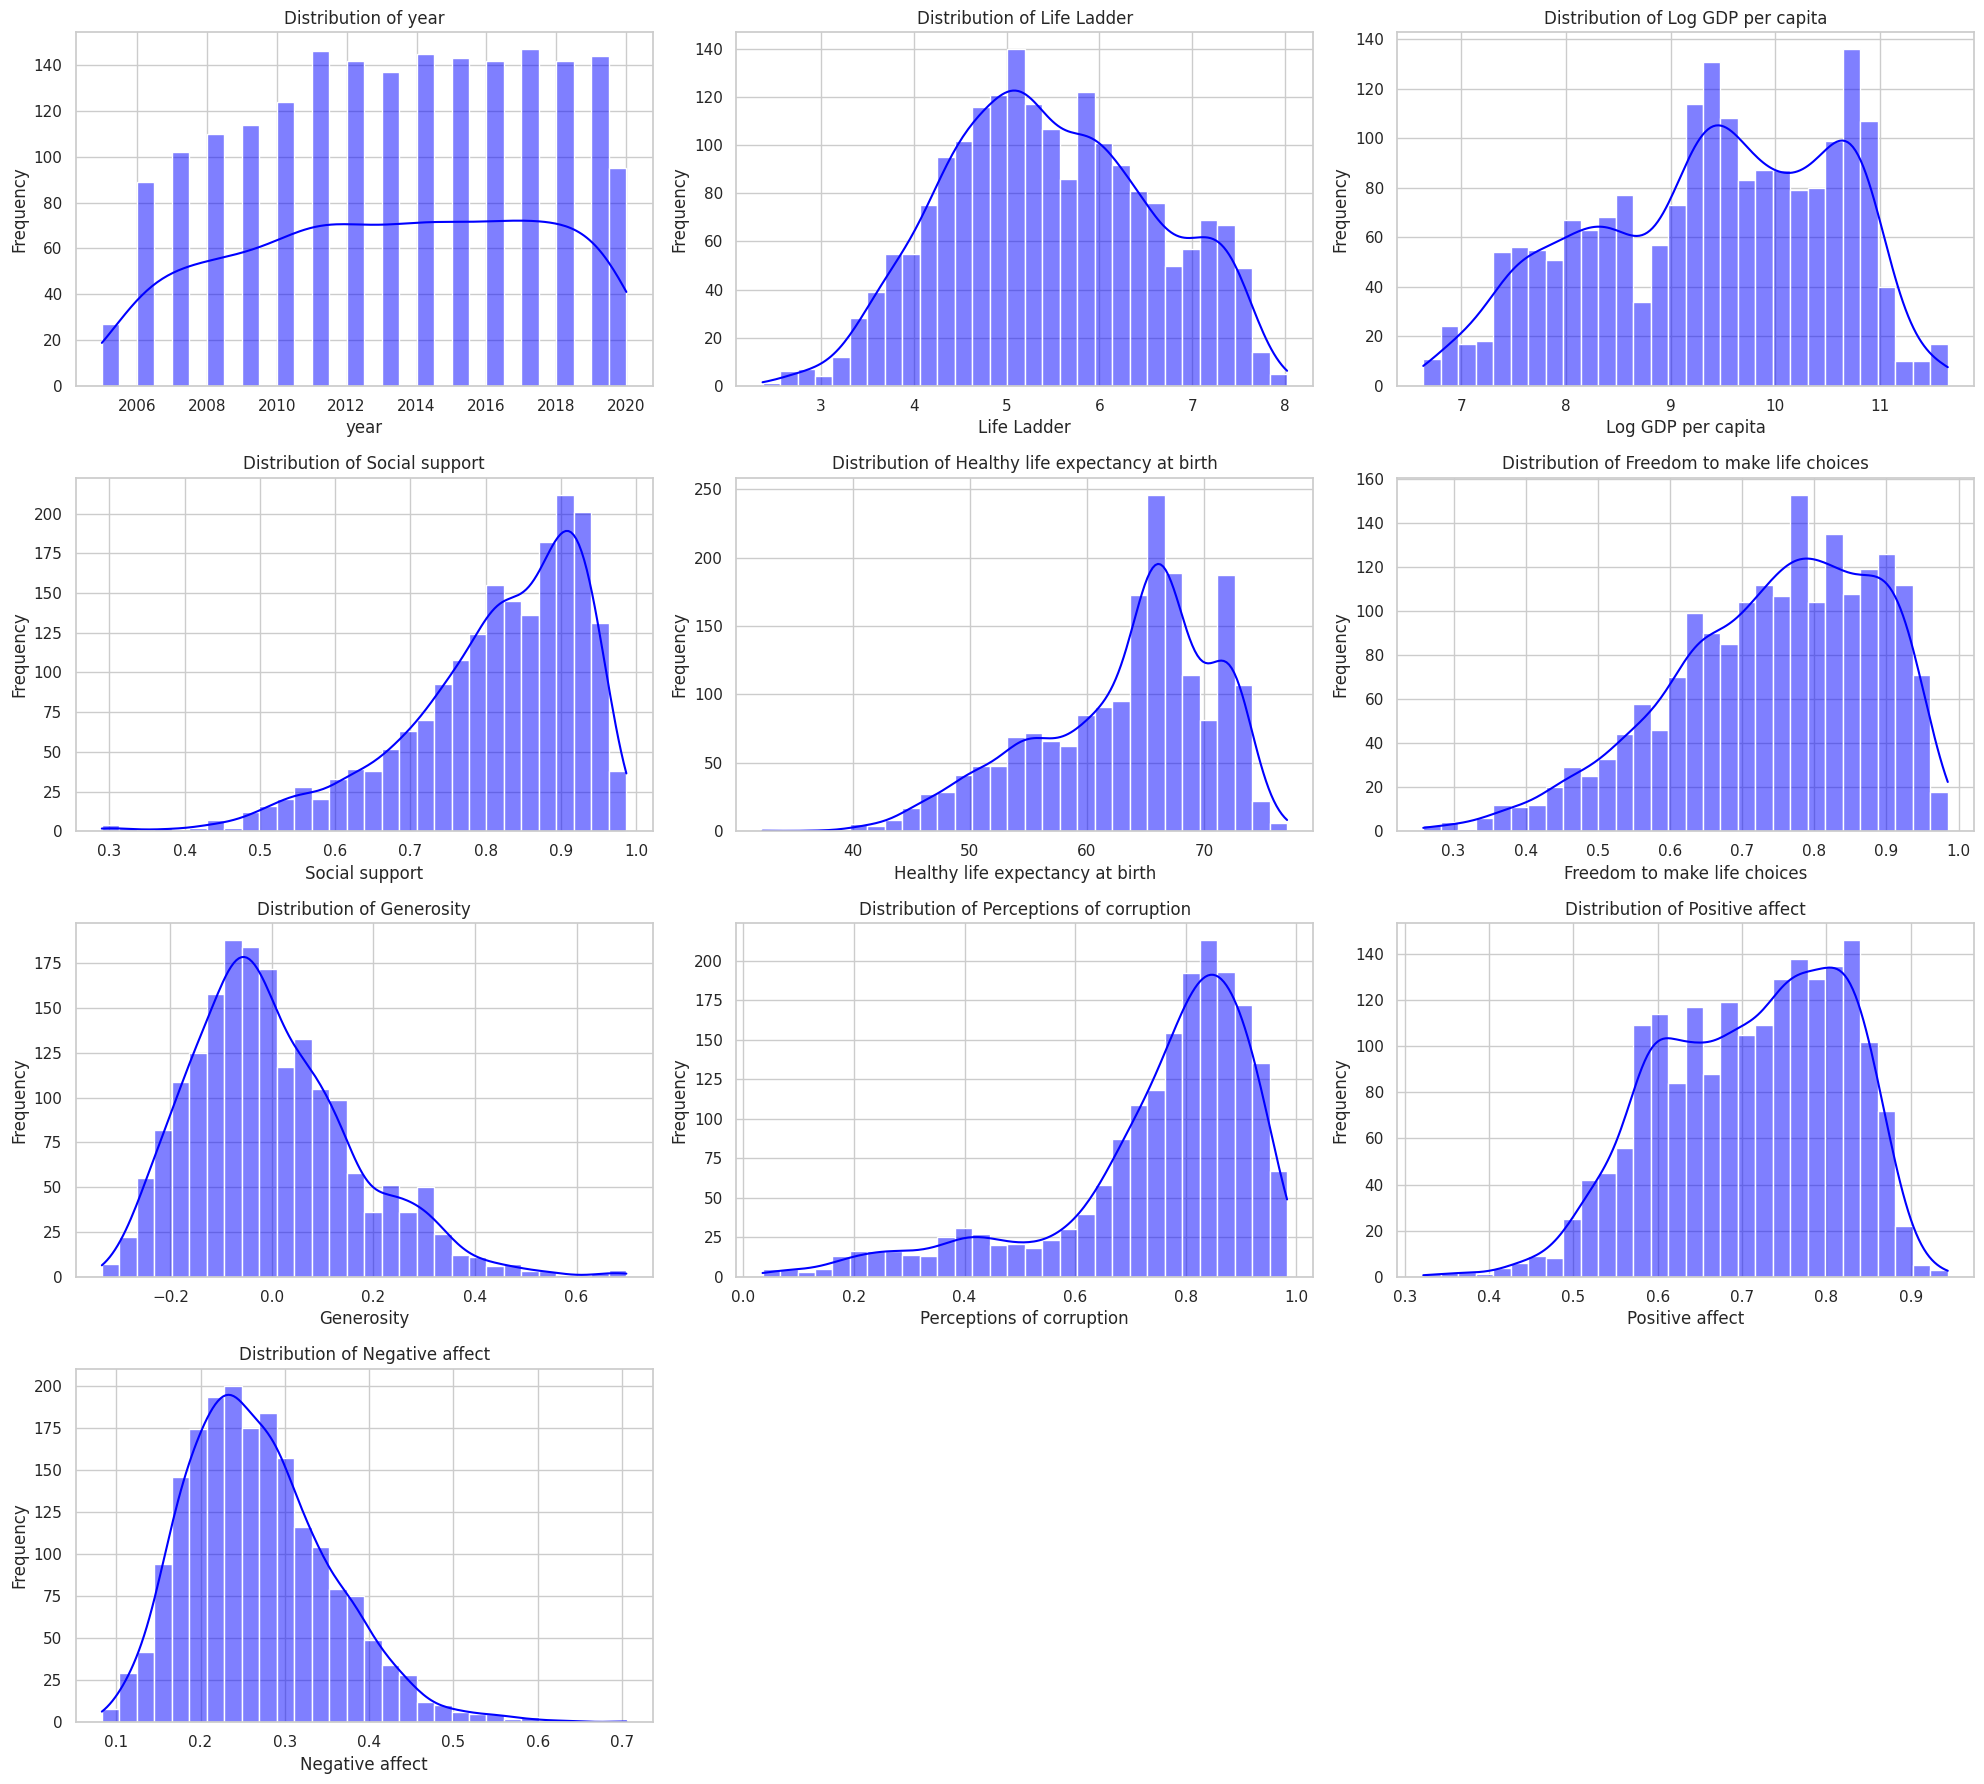

In [ ]:
# Set the style for seaborn
sns.set(style="whitegrid")

# List of columns to plot
columns = data.columns[1:]  # Exclude 'Country name'

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Loop through each column and create a histogram
for i, column in enumerate(columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

Data Preprosessing (Normalization)

For feature scaling of data we use min-max funtion

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to columns starting from the third column
scaled_columns = scaler.fit_transform(data.iloc[:, 2:])

# Create a new DataFrame with the scaled values
scaled_df = pd.DataFrame(scaled_columns, columns=data.columns[2:])

# Add back the 'Country name' and 'year' columns
scaled_df = pd.concat([data[['Country name', 'year']], scaled_df], axis=1)

# Display the first few rows of the scaled DataFrame
print(scaled_df.head())

  Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     0.239015            0.146619        0.230990   
1  Afghanistan  2009     0.359142            0.180531        0.375897   
2  Afghanistan  2010     0.422218            0.201875        0.357245   
3  Afghanistan  2011     0.258150            0.196489        0.331420   
4  Afghanistan  2012     0.249468            0.213445        0.331420   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                          0.412946                      0.632737    0.486931   
1                          0.421875                      0.579092    0.508228   
2                          0.430804                      0.470426    0.441433   
3                          0.437946                      0.327373    0.481123   
4                          0.445089                      0.375516    0.552759   

   Perceptions of corruption  Positive affect  Negative affect  
0        

In [ ]:
# Get the number of rows and columns
num_rows, num_columns = scaled_df.shape

# Get a statistical summary of the numerical columns
scaled_df_summary = scaled_df.describe(include='all')

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print("\nStatistical Summary:")
print(scaled_df_summary)

Number of rows: 1949
Number of columns: 11

Statistical Summary:
       Country name         year  Life Ladder  Log GDP per capita  \
count          1949  1949.000000  1949.000000         1913.000000   
unique          166          NaN          NaN                 NaN   
top        Zimbabwe          NaN          NaN                 NaN   
freq             15          NaN          NaN                 NaN   
mean            NaN  2013.216008     0.547786            0.545273   
std             NaN     4.166828     0.197681            0.230218   
min             NaN  2005.000000     0.000000            0.000000   
25%             NaN  2010.000000     0.401311            0.364851   
50%             NaN  2013.000000     0.533487            0.563535   
75%             NaN  2017.000000     0.692417            0.741672   
max             NaN  2020.000000     1.000000            1.000000   

        Social support  Healthy life expectancy at birth  \
count      1936.000000                       1

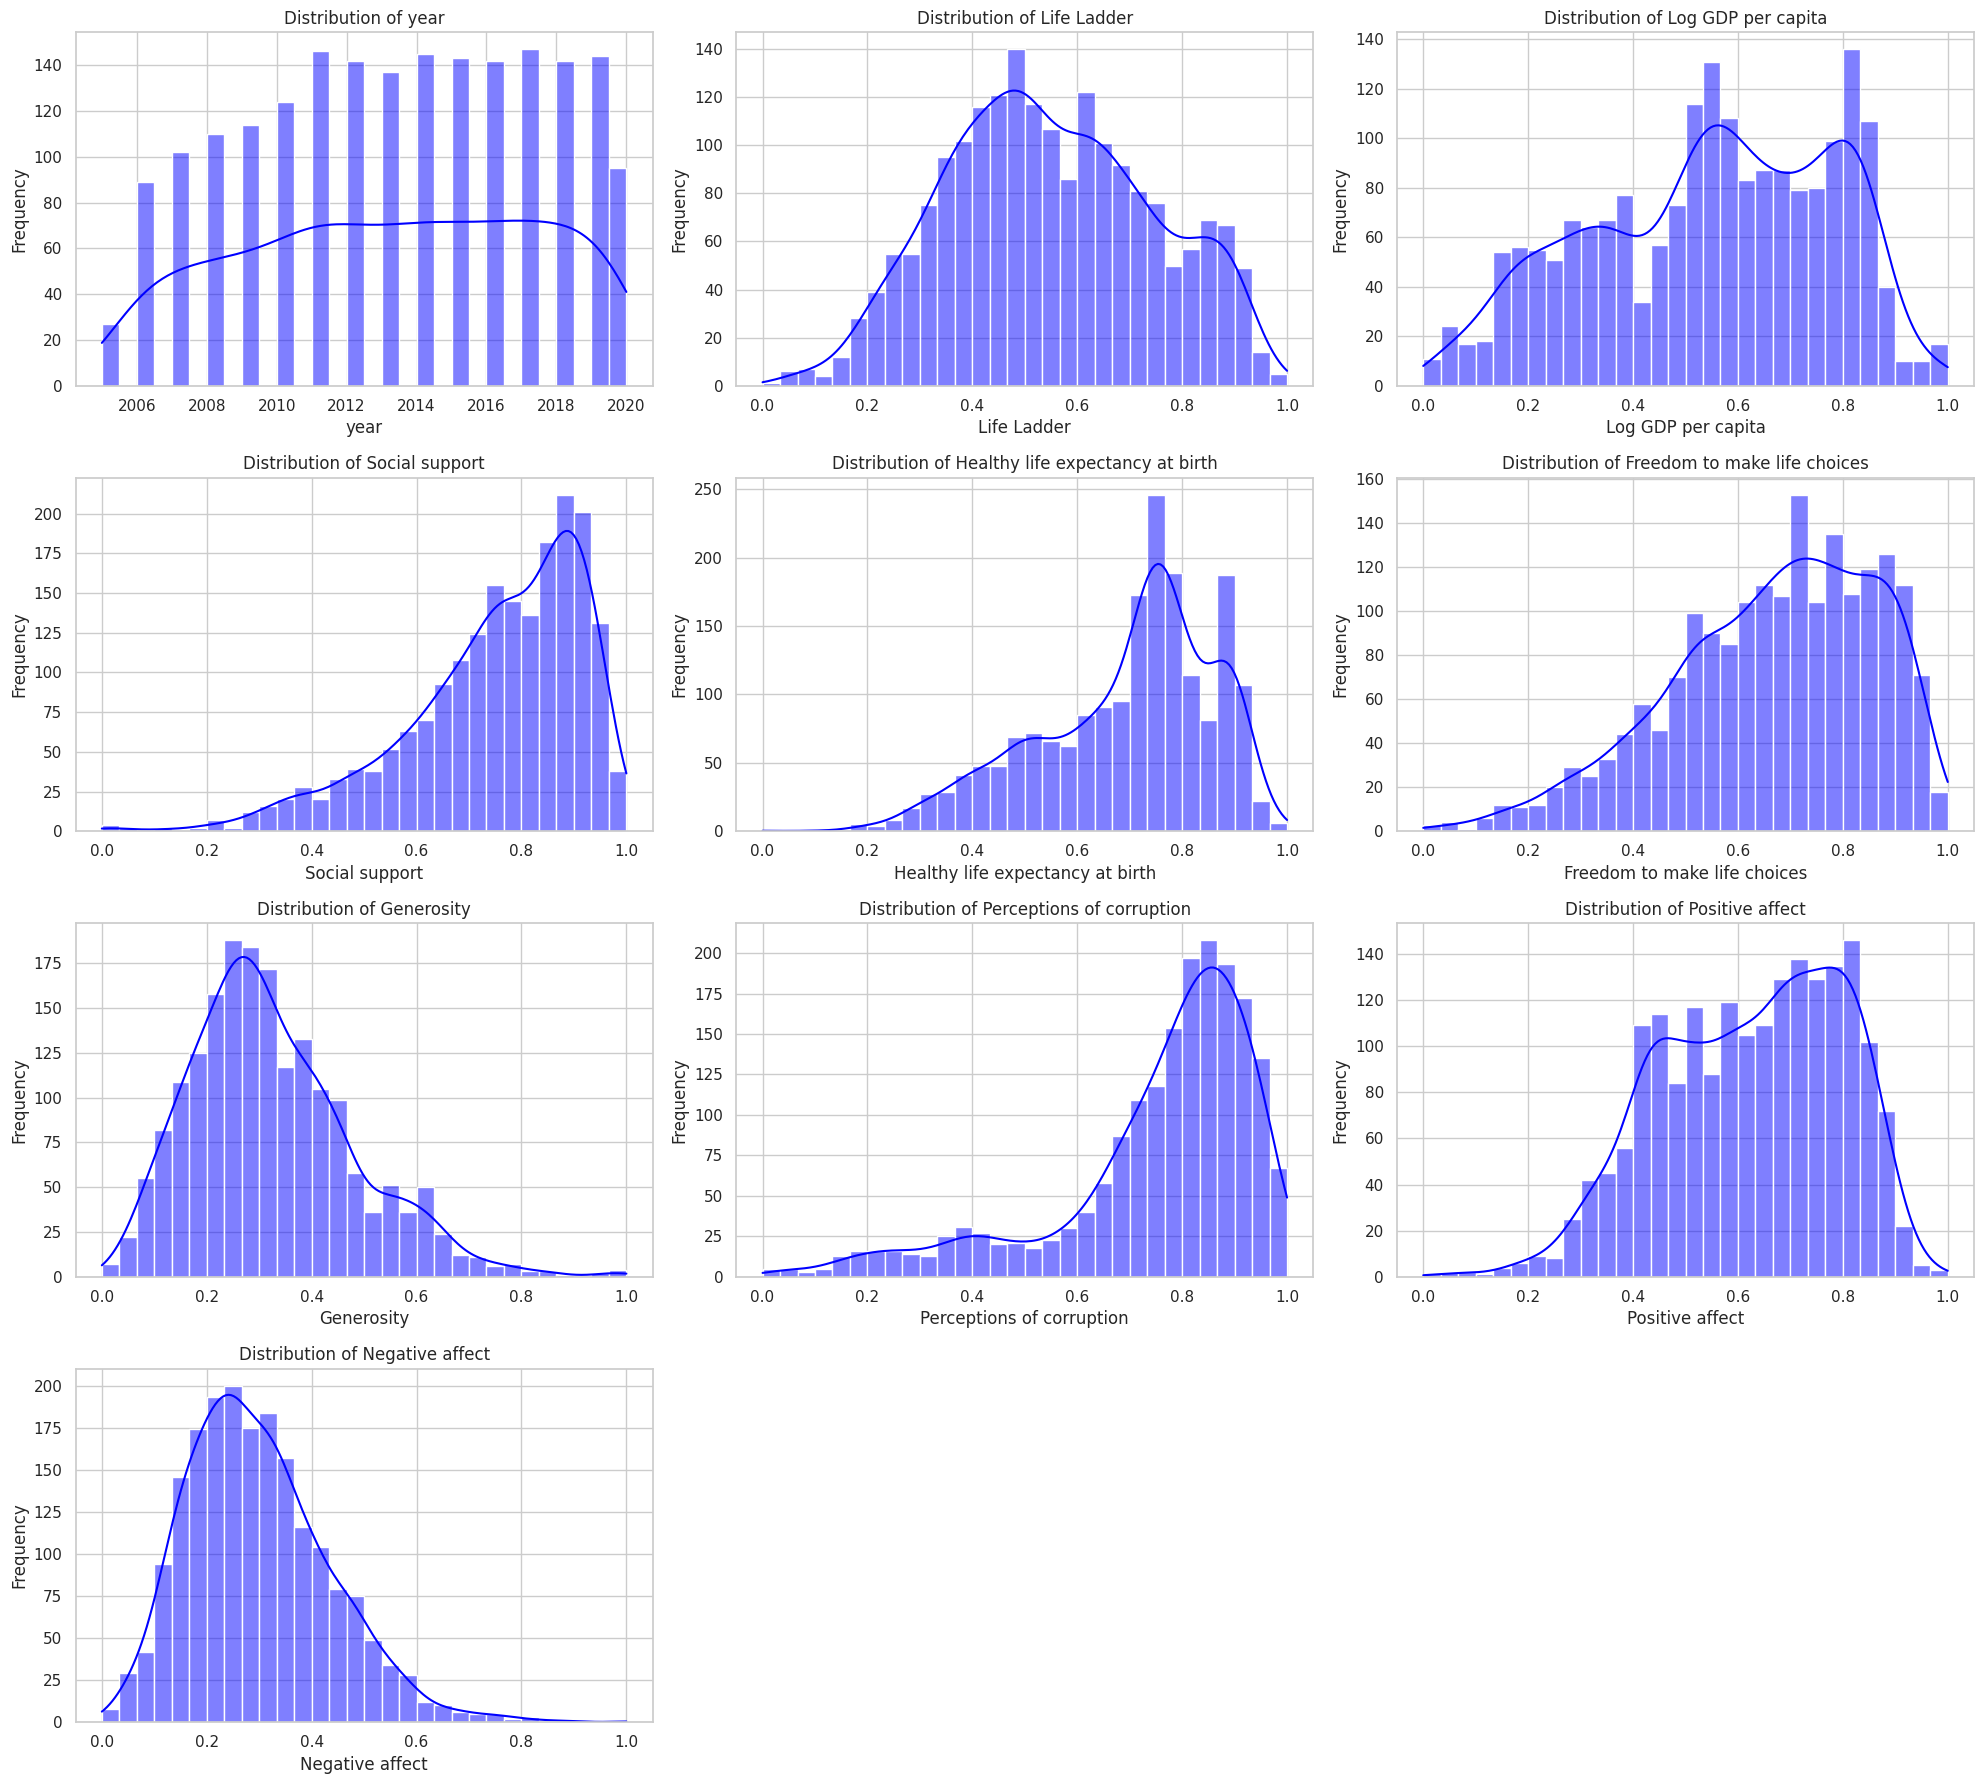

In [ ]:
# Set the style for seaborn
sns.set(style="whitegrid")

# List of columns to plot
columns = scaled_df.columns[1:]  # Exclude 'Country name'

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Loop through each column and create a histogram
for i, column in enumerate(columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(scaled_df[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

## Question C

### Answer
author ~ askadam

Life Ladder is considered as the label.
Scatter plot has been made considering relationship between life ladder and attributes.

Pearson correlation between Log GDP per capita and Life Ladder: 0.79 

Pearson correlation between Social support and Life Ladder: 0.71 

Pearson correlation between Healthy life expectancy at birth and Life Ladder: 0.75 

Pearson correlation between Freedom to make life choices and Life Ladder: 0.53 

Pearson correlation between Generosity and Life Ladder: 0.18 

Pearson correlation between Perceptions of corruption and Life Ladder: -0.45 

Pearson correlation between Positive affect and Life Ladder: 0.53 

Pearson correlation between Negative affect and Life Ladder: -0.30 



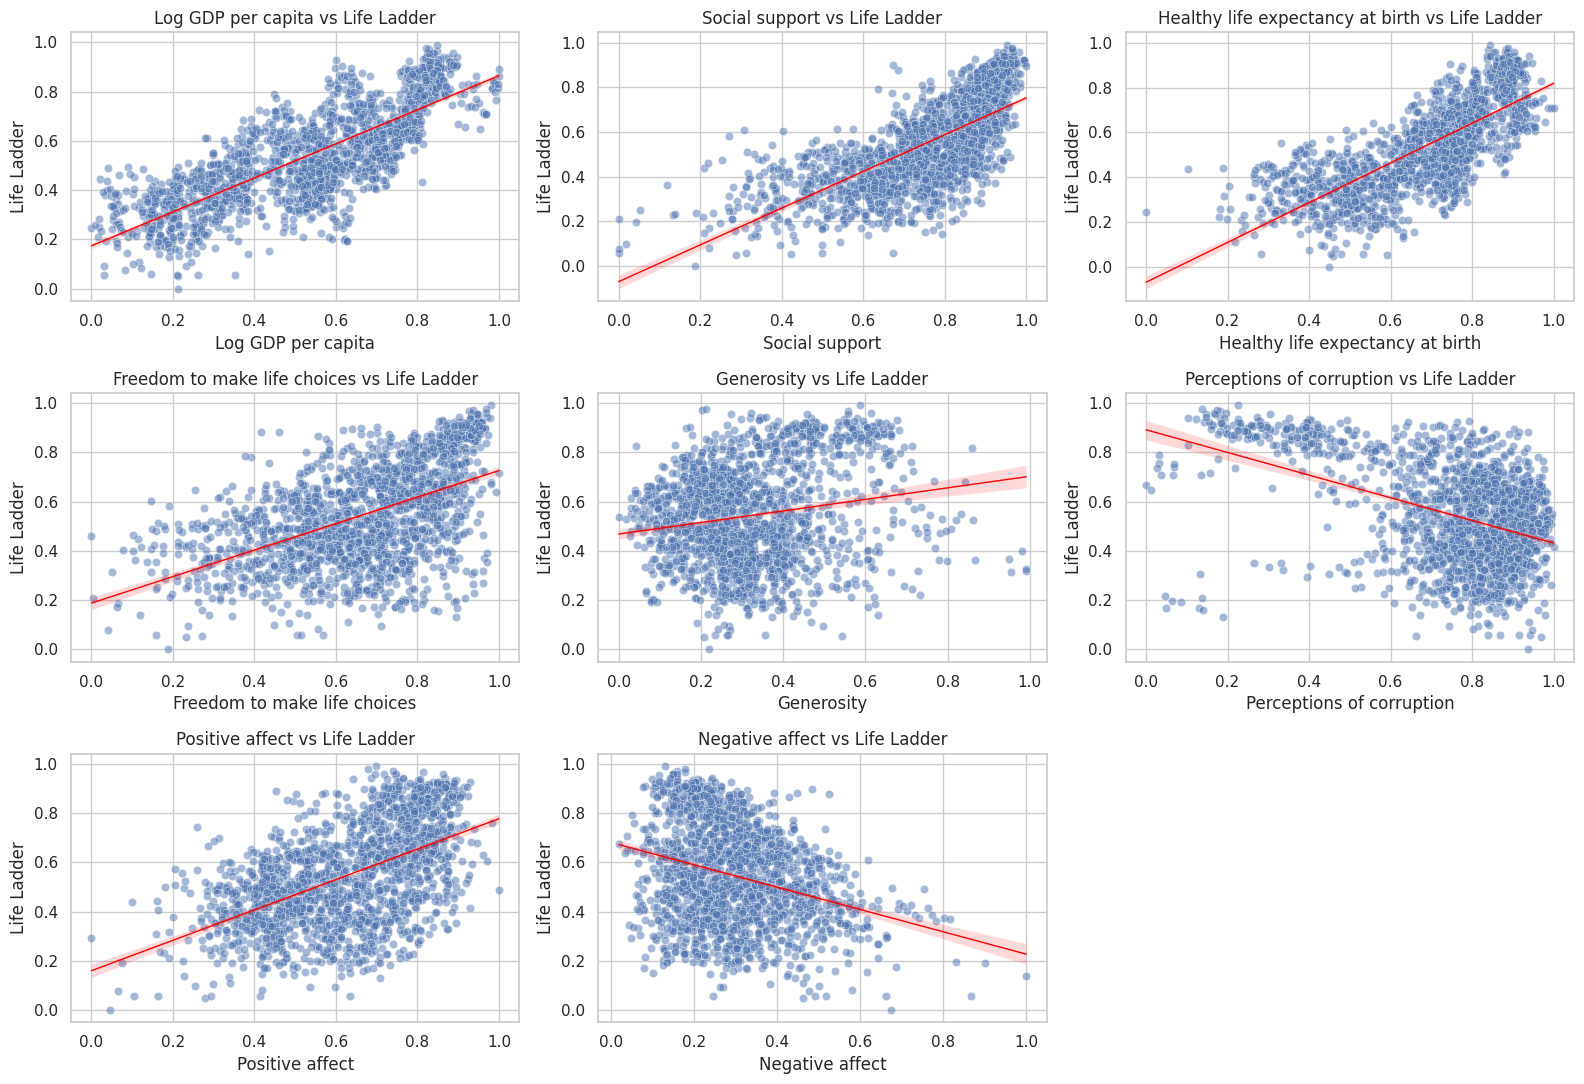

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import pearsonr

attributes = [
    'Log GDP per capita',
    'Social support',
    'Healthy life expectancy at birth',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption',
    'Positive affect',
    'Negative affect'
]

# missing values check
scaled_df = scaled_df.dropna(subset=['Life Ladder'] + attributes)
scaled_df[attributes + ['Life Ladder']] = scaled_df[attributes + ['Life Ladder']].apply(pd.to_numeric, errors='coerce')

for attribute in attributes:
    if scaled_df[attribute].isnull().any() or scaled_df['Life Ladder'].isnull().any():
        print(f'Cannot calculate PCC for {attribute} due to missing values.')
    else:
        corr, _ = pearsonr(scaled_df[attribute], scaled_df['Life Ladder'])
        print(f'Pearson correlation between {attribute} and Life Ladder: {corr:.2f} \n')

sns.set(style="whitegrid")

plt.figure(figsize=(16, 11))

for i, attribute in enumerate(attributes):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=scaled_df[attribute], y=scaled_df['Life Ladder'], alpha=0.5)
    sns.regplot(x=scaled_df[attribute], y=scaled_df['Life Ladder'], scatter=False, color='red', line_kws={"linewidth":1})
    plt.title(f'{attribute} vs Life Ladder')
    plt.xlabel(attribute)
    plt.ylabel('Life Ladder')

plt.tight_layout()
plt.show()

## Question D



### Answer


author ~ askadam

Ensured the test set's representativeness by applying **stratified sampling** based on "Life Ladder" scores during the data split, preserving distribution in both training and testing sets. Verified by comparing the **mean** and **standard deviation** of "Life Ladder" scores, confirming similar values and representativeness.

### Code


In [ ]:
from sklearn.model_selection import train_test_split

# Define bins for stratification based on 'Life Ladder'
bins = pd.qcut(scaled_df['Life Ladder'], q=6, labels=False) #bins adjusted to 6 here for close mean and std dev values

# Split the data into training and testing sets using stratification
train_data, test_data = train_test_split(scaled_df, test_size=0.25, random_state=42, stratify=bins)

# Verify that the test set is representative
print("Training set size:", len(train_data))
print("Test set size:", len(test_data))

# Check the distribution of 'Life Ladder' in both sets
print("\nTraining set 'Life Ladder' mean:", train_data['Life Ladder'].mean())
print("Test set 'Life Ladder' mean:", test_data['Life Ladder'].mean())

print("\nTraining set 'Life Ladder' std:", train_data['Life Ladder'].std())
print("Test set 'Life Ladder' std:", test_data['Life Ladder'].std())

Training set size: 1281
Test set size: 427

Training set 'Life Ladder' mean: 0.5438294021934272
Test set 'Life Ladder' mean: 0.545464541732158

Training set 'Life Ladder' std: 0.20129429158084372
Test set 'Life Ladder' std: 0.20187038249541167


## Question E
~ askadam
### Answer

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

feature_columns = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
                   'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
                   'Positive affect', 'Negative affect']  # Example features

target_column = 'Life Ladder'


# Convert relevant columns to numeric, errors='coerce' will convert non-numeric values to NaN
for col in feature_columns + [target_column]:
    scaled_df[col] = pd.to_numeric(scaled_df[col], errors='coerce')

# Drop rows with NaN values
scaled_df = scaled_df.dropna(subset=feature_columns + [target_column])

# Define bins for stratification based on 'Life Ladder'
bins = pd.qcut(scaled_df['Life Ladder'], q=6, labels=False)

# Split the data into training and testing sets using stratification
train_data, test_data = train_test_split(scaled_df, test_size=0.25, random_state=42, stratify=bins)

# Verify that the test set is representative
print("Training set size:", len(train_data))
print("Test set size:", len(test_data))

print("\nTraining set 'Life Ladder' mean:", train_data['Life Ladder'].mean())
print("Test set 'Life Ladder' mean:", test_data['Life Ladder'].mean())

print("\nTraining set 'Life Ladder' std:", train_data['Life Ladder'].std())
print("Test set 'Life Ladder' std:", test_data['Life Ladder'].std())

# Split the training data into features (X) and target (y)
X_train = train_data[feature_columns]
print(f"X_train shape: {X_train.shape}")
print(f"X_train columns: {X_train.columns.tolist()}")
y_train = train_data[target_column]

# Add a column of ones to X for the intercept term
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Convert to numpy arrays
X_train_b = X_train_b.astype(float)
y_train_np = y_train.values.astype(float)

# Closed-form solution for linear regression (Normal Equation)
theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train_np)

print("\nCoefficients:", theta_best)


Training set size: 1281
Test set size: 427

Training set 'Life Ladder' mean: 0.5438294021934272
Test set 'Life Ladder' mean: 0.545464541732158

Training set 'Life Ladder' std: 0.20129429158084372
Test set 'Life Ladder' std: 0.20187038249541167
X_train shape: (1281, 8)
X_train columns: ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']

Coefficients: [-0.0776282   0.33829001  0.2242415   0.23017458  0.06326793  0.06077485
 -0.11487818  0.21577688  0.01798717]


Linear Regression (Closed-Form Solution - Normal Equation)

In [ ]:
feature_columns = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
                   'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
                   'Positive affect', 'Negative affect']  # Example features

target_column = 'Life Ladder'

# Now prepare the test data
X_test = test_data[feature_columns]
print(f"X_test shape: {X_test.shape}")
print(f"X_test columns: {X_test.columns.tolist()}")
y_test = test_data[target_column]

# Add a column of ones to X_test for the intercept term
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Convert to numpy arrays
X_test_b = X_test_b.astype(float)
y_test_np = y_test.values.astype(float)

# Make predictions using the closed-form solution
y_pred_closed_form = X_test_b.dot(theta_best)

# Evaluate using MSE
from sklearn.metrics import mean_squared_error
mse_closed_form = mean_squared_error(y_test_np, y_pred_closed_form)

print(f"Closed-Form Solution MSE: {mse_closed_form}")

X_test shape: (427, 8)
X_test columns: ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
Closed-Form Solution MSE: 0.009155819867253875


 Linear Regression with Stochastic Gradient Descent (SGD)

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score

# Implementing SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, random_state=42)

# Cross-validation (3-fold)
scores = cross_val_score(sgd_reg, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
mse_sgd = -scores.mean()

print(f"SGD MSE (Cross-Validation): {mse_sgd}")

SGD MSE (Cross-Validation): 0.012671167696919556


Tracking Loss During Training

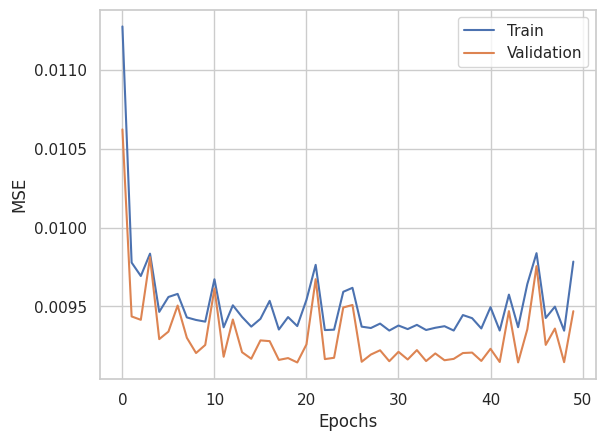

In [ ]:
import matplotlib.pyplot as plt

sgd_reg = SGDRegressor(max_iter=1, tol=1e-3, warm_start=True, penalty=None, learning_rate="constant", eta0=0.01)

n_epochs = 50
train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.fit(X_train, y_train)
    y_train_predict = sgd_reg.predict(X_train)
    y_val_predict = sgd_reg.predict(X_test)

    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_test, y_val_predict))

plt.plot(train_errors, label="Train")
plt.plot(val_errors, label="Validation")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()


Ridge regression

In [ ]:
from sklearn.linear_model import Ridge

alphas = [0.01, 0.1, 1]
for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    scores = cross_val_score(ridge_reg, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    mse_ridge = -scores.mean()
    print(f"Ridge Regression with alpha={alpha}: MSE={mse_ridge}")


Ridge Regression with alpha=0.01: MSE=0.009483756776558787
Ridge Regression with alpha=0.1: MSE=0.009482564643264772
Ridge Regression with alpha=1: MSE=0.009477403692346587


Lasso regression

In [ ]:
from sklearn.linear_model import Lasso

alphas = [0.01, 0.1, 1]
for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    scores = cross_val_score(lasso_reg, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    mse_lasso = -scores.mean()
    print(f"Lasso Regression with alpha={alpha}: MSE={mse_lasso}")


Lasso Regression with alpha=0.01: MSE=0.015169401649254387
Lasso Regression with alpha=0.1: MSE=0.04051418194044227
Lasso Regression with alpha=1: MSE=0.04051418194044227


Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet

l1_ratios = [0.2, 0.5, 0.8]
for l1_ratio in l1_ratios:
    elastic_net = ElasticNet(alpha=0.1, l1_ratio=l1_ratio)
    scores = cross_val_score(elastic_net, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    mse_elastic_net = -scores.mean()
    print(f"Elastic Net with l1_ratio={l1_ratio}: MSE={mse_elastic_net}")


Elastic Net with l1_ratio=0.2: MSE=0.03160910635287064
Elastic Net with l1_ratio=0.5: MSE=0.04051418194044227
Elastic Net with l1_ratio=0.8: MSE=0.04051418194044227


Impact of Batch Size and Learning Rate (For SGD)

Batch Size 10, Epoch 1/50, Training Loss: 0.0218
Batch Size 10, Epoch 2/50, Training Loss: 0.0193
Batch Size 10, Epoch 3/50, Training Loss: 0.0173
Batch Size 10, Epoch 4/50, Training Loss: 0.0158
Batch Size 10, Epoch 5/50, Training Loss: 0.0146
Batch Size 10, Epoch 6/50, Training Loss: 0.0136
Batch Size 10, Epoch 7/50, Training Loss: 0.0128
Batch Size 10, Epoch 8/50, Training Loss: 0.0121
Batch Size 10, Epoch 9/50, Training Loss: 0.0116
Batch Size 10, Epoch 10/50, Training Loss: 0.0112
Batch Size 10, Epoch 11/50, Training Loss: 0.0109
Batch Size 10, Epoch 12/50, Training Loss: 0.0107
Batch Size 10, Epoch 13/50, Training Loss: 0.0106
Batch Size 10, Epoch 14/50, Training Loss: 0.0103
Batch Size 10, Epoch 15/50, Training Loss: 0.0101
Batch Size 10, Epoch 16/50, Training Loss: 0.0101
Batch Size 10, Epoch 17/50, Training Loss: 0.0100
Batch Size 10, Epoch 18/50, Training Loss: 0.0099
Batch Size 10, Epoch 19/50, Training Loss: 0.0098
Batch Size 10, Epoch 20/50, Training Loss: 0.0098
Batch Siz

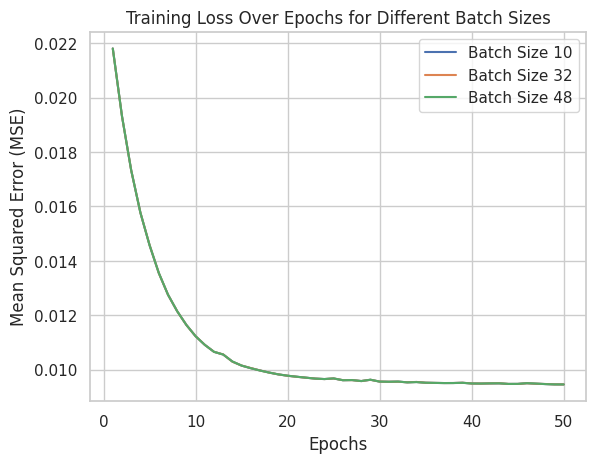

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train and y_train are already defined and preprocessed
X_train_np = X_train.to_numpy()  # Convert to NumPy array if it's not already
y_train_np = y_train.to_numpy()  # Convert to NumPy array if it's not already

n_epochs = 50  # Number of epochs (full passes over the data)
batch_sizes = [10, 32, 48]  # Specific batch sizes to iterate over

# Dictionary to store training losses for each batch size
batch_size_losses = {}

# Loop over each batch size
for batch_size in batch_sizes:
    n_batches = int(np.ceil(X_train_np.shape[0] / batch_size))  # Number of batches per epoch
    training_losses = []  # Track training loss over iterations

    # Reinitialize the SGD Regressor for each batch size
    sgd_reg = SGDRegressor(max_iter=1, tol=1e-3, penalty=None, learning_rate="constant", eta0=0.001, random_state=42)

    # Perform mini-batch gradient descent
    for epoch in range(n_epochs):
        # Shuffle the data at the beginning of each epoch
        X_train_shuffled, y_train_shuffled = shuffle(X_train_np, y_train_np, random_state=epoch)

        # Process each batch
        for i in range(n_batches):
            # Define the mini-batch
            start_idx = i * batch_size
            end_idx = min(start_idx + batch_size, X_train_np.shape[0])
            X_batch = X_train_shuffled[start_idx:end_idx]
            y_batch = y_train_shuffled[start_idx:end_idx]

            # Perform a partial fit on the mini-batch
            sgd_reg.partial_fit(X_batch, y_batch)

        # Calculate and record the training loss after each epoch
        y_train_pred = sgd_reg.predict(X_train_np)
        training_loss = mean_squared_error(y_train_np, y_train_pred)
        training_losses.append(training_loss)

        # Print progress for each batch size and epoch
        print(f"Batch Size {batch_size}, Epoch {epoch + 1}/{n_epochs}, Training Loss: {training_loss:.4f}")

    # Store the losses for this batch size
    batch_size_losses[batch_size] = training_losses

# Plot training loss over epochs for each batch size
for batch_size, losses in batch_size_losses.items():
    plt.plot(range(1, n_epochs + 1), losses, label=f'Batch Size {batch_size}')

plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Loss Over Epochs for Different Batch Sizes')
plt.grid(True)
plt.legend()
plt.show()


 The curve shows a decreasing trend, indicating that the training loss reduces as the number of epochs increases, stabilizing around an MSE of approximately 0.0097

In [ ]:
# Example of changing learning rate
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, learning_rate="constant", eta0=0.001)

scores = cross_val_score(sgd_reg, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
mse_sgd_lr = -scores.mean()

print(f"SGD MSE with learning rate 0.001: {mse_sgd_lr}")

# Experiment with different learning rates by adjusting the 'eta0' parameter


SGD MSE with learning rate 0.001: 0.015009416357800627


MSE Value: The MSE value of 0.014962223997980195 is relatively low, suggesting that the model is performing well in terms of minimizing prediction errors. ,,,







  fffyutyThe graphs show a consistent decrease in MSE, which is a positive sign of convergence and effective training.

## Question F

author ~ askadam

###Answer

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Sample DataFrame (scaled_df) creation
# Note: You should already have your data loaded into scaled_df
# For example, let's say scaled_df is your DataFrame containing features and target

# Create the feature set (X) and target set (y)
X = scaled_df.drop(['Country name', 'year','Life Ladder'], axis=1)  # Features
print(X.shape)
print("Columns in X:", X.columns.tolist())
y = scaled_df['Life Ladder']
# Step 1: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Convert the validation data to NumPy arrays
X_val_np = X_val.to_numpy()  # Convert validation data to NumPy array
y_val_np = y_val.to_numpy()  # Convert validation targets to NumPy array

# Now X_val_np and y_val_np are ready to be used


(1708, 8)
Columns in X: ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']


Batch Size 10, Epoch 1/50, Training Loss: 0.0288, Validation Loss: 0.0289
Batch Size 10, Epoch 2/50, Training Loss: 0.0108, Validation Loss: 0.0105
Batch Size 10, Epoch 3/50, Training Loss: 0.0095, Validation Loss: 0.0090
Batch Size 10, Epoch 4/50, Training Loss: 0.0094, Validation Loss: 0.0090
Batch Size 10, Epoch 5/50, Training Loss: 0.0095, Validation Loss: 0.0090
Batch Size 10, Epoch 6/50, Training Loss: 0.0094, Validation Loss: 0.0089
Batch Size 10, Epoch 7/50, Training Loss: 0.0094, Validation Loss: 0.0090
Batch Size 10, Epoch 8/50, Training Loss: 0.0094, Validation Loss: 0.0089
Batch Size 10, Epoch 9/50, Training Loss: 0.0094, Validation Loss: 0.0089
Batch Size 10, Epoch 10/50, Training Loss: 0.0094, Validation Loss: 0.0089
Batch Size 10, Epoch 11/50, Training Loss: 0.0094, Validation Loss: 0.0089
Batch Size 10, Epoch 12/50, Training Loss: 0.0094, Validation Loss: 0.0089
Batch Size 10, Epoch 13/50, Training Loss: 0.0094, Validation Loss: 0.0089
Batch Size 10, Epoch 14/50, Traini

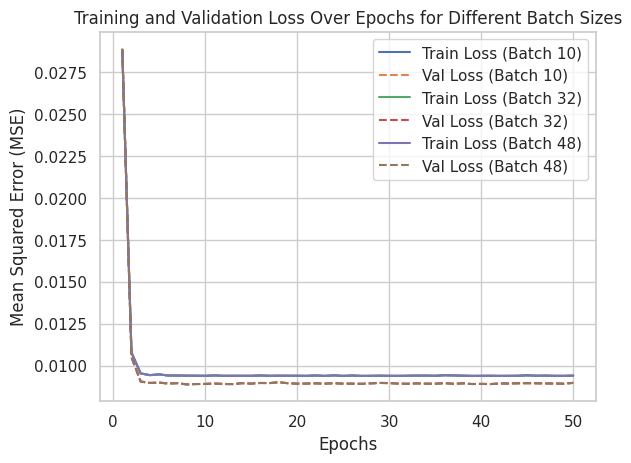

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_val, and y_val are already defined and preprocessed
X_train_np = X_train.to_numpy()  # Convert to NumPy array if it's not already
y_train_np = y_train.to_numpy()  # Convert to NumPy array if it's not already
X_val_np = X_val.to_numpy()  # Convert validation data to NumPy array
y_val_np = y_val.to_numpy()  # Convert validation targets to NumPy array

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_np)
X_val_scaled = scaler.transform(X_val_np)

n_epochs = 50  # Number of epochs (full passes over the data)
batch_sizes = [10, 32, 48]  # Specific batch sizes to iterate over

# Dictionary to store training and validation losses for each batch size
losses = {}

# Loop over each batch size
for batch_size in batch_sizes:
    n_batches = int(np.ceil(X_train_scaled.shape[0] / batch_size))  # Number of batches per epoch
    training_losses = []  # Track training loss over iterations
    validation_losses = []  # Track validation loss over iterations

    # Reinitialize the SGD Regressor for each batch size
    sgd_reg = SGDRegressor(max_iter=1, tol=None, penalty=None, learning_rate="constant", eta0=0.001, random_state=42)

    # Perform mini-batch gradient descent
    for epoch in range(n_epochs):
        # Shuffle the data at the beginning of each epoch
        X_train_shuffled, y_train_shuffled = shuffle(X_train_scaled, y_train_np, random_state=epoch)

        # Process each batch
        for i in range(n_batches):
            # Define the mini-batch
            start_idx = i * batch_size
            end_idx = min(start_idx + batch_size, X_train_scaled.shape[0])
            X_batch = X_train_shuffled[start_idx:end_idx]
            y_batch = y_train_shuffled[start_idx:end_idx]

            # Perform a partial fit on the mini-batch
            sgd_reg.partial_fit(X_batch, y_batch)

        # Calculate and record the training loss after each epoch
        y_train_pred = sgd_reg.predict(X_train_scaled)
        training_loss = mean_squared_error(y_train_np, y_train_pred)
        training_losses.append(training_loss)

        # Calculate validation loss
        y_val_pred = sgd_reg.predict(X_val_scaled)
        validation_loss = mean_squared_error(y_val_np, y_val_pred)
        validation_losses.append(validation_loss)

        # Print progress for each batch size and epoch
        print(f"Batch Size {batch_size}, Epoch {epoch + 1}/{n_epochs}, Training Loss: {training_loss:.4f}, Validation Loss: {validation_loss:.4f}")

    # Store the losses for this batch size
    losses[batch_size] = (training_losses, validation_losses)

# Plot training and validation loss over epochs for each batch size
for batch_size, (train_losses, val_losses) in losses.items():
    plt.plot(range(1, n_epochs + 1), train_losses, label=f'Train Loss (Batch {batch_size})')
    plt.plot(range(1, n_epochs + 1), val_losses, linestyle='--', label=f'Val Loss (Batch {batch_size})')

plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation Loss Over Epochs for Different Batch Sizes')
plt.grid(True)
plt.legend()
plt.show()


Feature Scaling with StandardScaler: Scaling the features ensures that they are all on the same scale, which is especially important for SGD since the learning rate may be sensitive to feature scales.

Avoiding Polynomial Features: The model is trained directly on the original features after scaling, without introducing higher-order terms. This keeps the model simpler and faster but may still lead to good results depending on the dataset.

Mini-Batch Gradient Descent: The code maintains mini-batch training with different batch sizes for comparison.

## Question G

author ~ askadam

### Answer

In [ ]:
# Assuming sgd_reg is your trained model
X_test_np = X_test.to_numpy()  # Convert test data to NumPy array if it's not already
y_test_np = y_test.to_numpy()  # Convert test labels to NumPy array if it's not already

# Make predictions
y_pred = sgd_reg.predict(X_test_np)


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on the validation set (test data)
y_val_pred = sgd_reg.predict(X_val_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_val_np, y_val_pred)
rmse = np.sqrt(mse)

# Print the results
print(f"Validation MSE: {mse:.4f}")
print(f"Validation RMSE: {rmse:.4f}")

# Additionally, print a few predictions and their true values for comparison
print("\nSample of Predictions vs True Values:")
for i in range(5):
    print(f"Predicted: {y_val_pred[i]:.4f}, Actual: {y_val_np[i]:.4f}")


Validation MSE: 0.0090
Validation RMSE: 0.0947

Sample of Predictions vs True Values:
Predicted: 0.7914, Actual: 0.8747
Predicted: 0.4306, Actual: 0.5517
Predicted: 0.2238, Actual: 0.1899
Predicted: 0.3824, Actual: 0.3864
Predicted: 0.6368, Actual: 0.6650



Although the model is performing well, the second sample shows an error of about 0.12 units, which is relatively higher than the others. This suggests that the model may not be capturing certain complex relationships for some instances, potentially due to feature interactions or noise.

Adding or dropping interaction terms manually can increase performance:

scaled_df['GDP_Support_Interaction'] = scaled_df['Log GDP per capita'] * scaled_df['Social support']

scaled_df['Freedom_Corruption_Interaction'] = scaled_df['Freedom to make life choices'] * scaled_df['Perceptions of corruption']



Were calculating R² value for Training and Validation sets:

Batch Size 10, Epoch 1/50, Training Loss: 0.0288, Validation Loss: 0.0289, Training R²: 0.2938, Validation R²: 0.2716
Batch Size 10, Epoch 2/50, Training Loss: 0.0108, Validation Loss: 0.0105, Training R²: 0.7356, Validation R²: 0.7353
Batch Size 10, Epoch 3/50, Training Loss: 0.0095, Validation Loss: 0.0090, Training R²: 0.7660, Validation R²: 0.7718
Batch Size 10, Epoch 4/50, Training Loss: 0.0094, Validation Loss: 0.0090, Training R²: 0.7685, Validation R²: 0.7739
Batch Size 10, Epoch 5/50, Training Loss: 0.0095, Validation Loss: 0.0090, Training R²: 0.7675, Validation R²: 0.7734
Batch Size 10, Epoch 6/50, Training Loss: 0.0094, Validation Loss: 0.0089, Training R²: 0.7691, Validation R²: 0.7748
Batch Size 10, Epoch 7/50, Training Loss: 0.0094, Validation Loss: 0.0090, Training R²: 0.7691, Validation R²: 0.7742
Batch Size 10, Epoch 8/50, Training Loss: 0.0094, Validation Loss: 0.0089, Training R²: 0.7693, Validation R²: 0.7761
Batch Size 10, Epoch 9/50, Training Loss: 0.0094, Valida

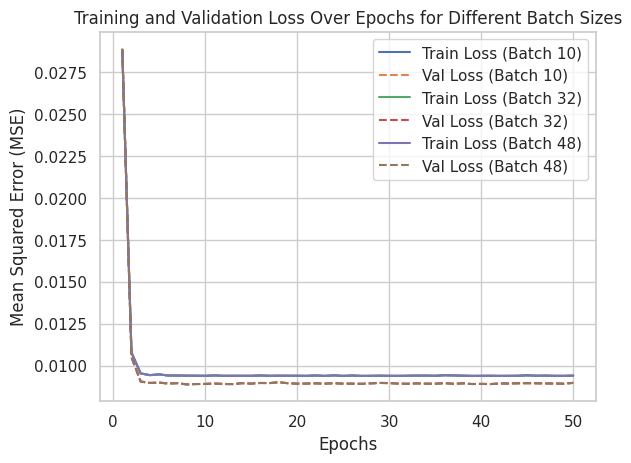

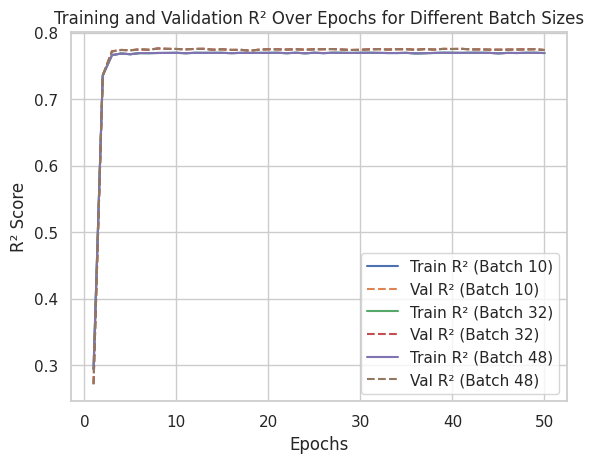

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score  # Import r2_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_val, and y_val are already defined and preprocessed
X_train_np = X_train.to_numpy()  # Convert to NumPy array if it's not already
y_train_np = y_train.to_numpy()  # Convert to NumPy array if it's not already
X_val_np = X_val.to_numpy()  # Convert validation data to NumPy array
y_val_np = y_val.to_numpy()  # Convert validation targets to NumPy array

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_np)
X_val_scaled = scaler.transform(X_val_np)

n_epochs = 50  # Number of epochs (full passes over the data)
batch_sizes = [10, 32, 48]  # Specific batch sizes to iterate over

# Dictionary to store training and validation losses for each batch size
losses = {}

# Loop over each batch size
for batch_size in batch_sizes:
    n_batches = int(np.ceil(X_train_scaled.shape[0] / batch_size))  # Number of batches per epoch
    training_losses = []  # Track training loss over iterations
    validation_losses = []  # Track validation loss over iterations
    training_r2_scores = []  # Track training R² over iterations
    validation_r2_scores = []  # Track validation R² over iterations

    # Reinitialize the SGD Regressor for each batch size
    sgd_reg = SGDRegressor(max_iter=1, tol=None, penalty=None, learning_rate="constant", eta0=0.001, random_state=42)

    # Perform mini-batch gradient descent
    for epoch in range(n_epochs):
        # Shuffle the data at the beginning of each epoch
        X_train_shuffled, y_train_shuffled = shuffle(X_train_scaled, y_train_np, random_state=epoch)

        # Process each batch
        for i in range(n_batches):
            # Define the mini-batch
            start_idx = i * batch_size
            end_idx = min(start_idx + batch_size, X_train_scaled.shape[0])
            X_batch = X_train_shuffled[start_idx:end_idx]
            y_batch = y_train_shuffled[start_idx:end_idx]

            # Perform a partial fit on the mini-batch
            sgd_reg.partial_fit(X_batch, y_batch)

        # Calculate and record the training loss and R² after each epoch
        y_train_pred = sgd_reg.predict(X_train_scaled)
        training_loss = mean_squared_error(y_train_np, y_train_pred)
        training_losses.append(training_loss)

        training_r2 = r2_score(y_train_np, y_train_pred)  # Calculate R² for training set
        training_r2_scores.append(training_r2)

        # Calculate validation loss and R²
        y_val_pred = sgd_reg.predict(X_val_scaled)
        validation_loss = mean_squared_error(y_val_np, y_val_pred)
        validation_losses.append(validation_loss)

        validation_r2 = r2_score(y_val_np, y_val_pred)  # Calculate R² for validation set
        validation_r2_scores.append(validation_r2)

        # Print progress for each batch size and epoch with R² scores
        print(f"Batch Size {batch_size}, Epoch {epoch + 1}/{n_epochs}, Training Loss: {training_loss:.4f}, "
              f"Validation Loss: {validation_loss:.4f}, Training R²: {training_r2:.4f}, Validation R²: {validation_r2:.4f}")

    # Store the losses and R² scores for this batch size
    losses[batch_size] = (training_losses, validation_losses, training_r2_scores, validation_r2_scores)

# Plot training and validation loss over epochs for each batch size
for batch_size, (train_losses, val_losses, train_r2, val_r2) in losses.items():
    plt.plot(range(1, n_epochs + 1), train_losses, label=f'Train Loss (Batch {batch_size})')
    plt.plot(range(1, n_epochs + 1), val_losses, linestyle='--', label=f'Val Loss (Batch {batch_size})')

plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation Loss Over Epochs for Different Batch Sizes')
plt.grid(True)
plt.legend()
plt.show()

# Plot R² scores for training and validation over epochs for each batch size
for batch_size, (train_losses, val_losses, train_r2, val_r2) in losses.items():
    plt.plot(range(1, n_epochs + 1), train_r2, label=f'Train R² (Batch {batch_size})')
    plt.plot(range(1, n_epochs + 1), val_r2, linestyle='--', label=f'Val R² (Batch {batch_size})')

plt.xlabel('Epochs')
plt.ylabel('R² Score')
plt.title('Training and Validation R² Over Epochs for Different Batch Sizes')
plt.grid(True)
plt.legend()
plt.show()


Optimized Code with Feature Importance:

Epoch 1/50, Training Loss: 0.0288, Validation Loss: 0.0289, Training R²: 0.2939, Validation R²: 0.2716
Epoch 2/50, Training Loss: 0.0108, Validation Loss: 0.0105, Training R²: 0.7356, Validation R²: 0.7354
Epoch 3/50, Training Loss: 0.0095, Validation Loss: 0.0091, Training R²: 0.7659, Validation R²: 0.7717
Epoch 4/50, Training Loss: 0.0094, Validation Loss: 0.0090, Training R²: 0.7685, Validation R²: 0.7739
Epoch 5/50, Training Loss: 0.0095, Validation Loss: 0.0090, Training R²: 0.7675, Validation R²: 0.7735
Epoch 6/50, Training Loss: 0.0094, Validation Loss: 0.0089, Training R²: 0.7690, Validation R²: 0.7746
Epoch 7/50, Training Loss: 0.0094, Validation Loss: 0.0090, Training R²: 0.7689, Validation R²: 0.7740
Epoch 8/50, Training Loss: 0.0094, Validation Loss: 0.0089, Training R²: 0.7693, Validation R²: 0.7761
Epoch 9/50, Training Loss: 0.0094, Validation Loss: 0.0089, Training R²: 0.7694, Validation R²: 0.7756
Epoch 10/50, Training Loss: 0.0094, Validation Loss: 0.0089, Training R²:

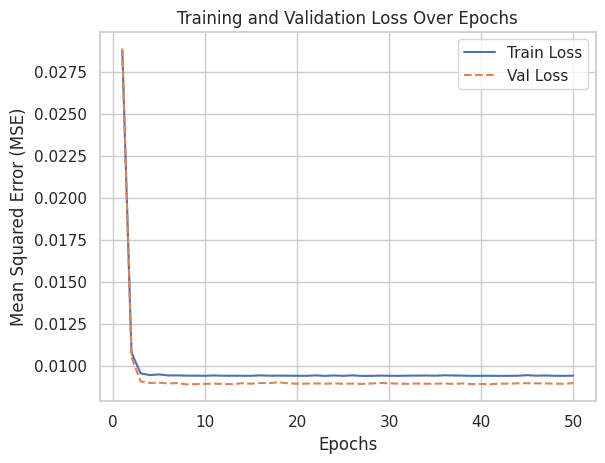

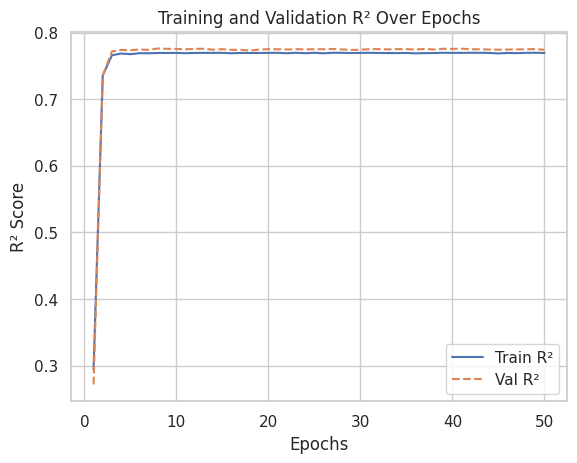


Feature Importance (sorted):
Log GDP per capita: 0.0801
Healthy life expectancy at birth: 0.0386
Social support: 0.0374
Positive affect: 0.0367
Perceptions of corruption: 0.0243
Freedom to make life choices: 0.0136
Generosity: 0.0129
Negative affect: 0.0027


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_val, and y_val are already defined and preprocessed
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_val_np = X_val.to_numpy()
y_val_np = y_val.to_numpy()

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_np)
X_val_scaled = scaler.transform(X_val_np)

n_epochs = 50
batch_sizes = [32]  # Use an optimized batch size for simplicity

# Store results for the best model and hyperparameters
best_model = None
best_val_loss = float('inf')
best_batch_size = None
best_training_r2 = None
best_validation_r2 = None

# Loop over each batch size
for batch_size in batch_sizes:
    n_batches = int(np.ceil(X_train_scaled.shape[0] / batch_size))
    training_losses = []
    validation_losses = []
    training_r2_scores = []
    validation_r2_scores = []

    # Reinitialize the SGD Regressor
    sgd_reg = SGDRegressor(max_iter=1, tol=None, penalty='l2', alpha=0.01, learning_rate="constant", eta0=0.001, random_state=42)

    # Perform mini-batch gradient descent
    for epoch in range(n_epochs):
        # Shuffle the data
        X_train_shuffled, y_train_shuffled = shuffle(X_train_scaled, y_train_np, random_state=epoch)

        # Process each batch
        for i in range(n_batches):
            start_idx = i * batch_size
            end_idx = min(start_idx + batch_size, X_train_scaled.shape[0])
            X_batch = X_train_shuffled[start_idx:end_idx]
            y_batch = y_train_shuffled[start_idx:end_idx]

            # Perform a partial fit
            sgd_reg.partial_fit(X_batch, y_batch)

        # Calculate the training and validation predictions
        y_train_pred = sgd_reg.predict(X_train_scaled)
        y_val_pred = sgd_reg.predict(X_val_scaled)

        # Calculate and record the losses
        training_loss = mean_squared_error(y_train_np, y_train_pred)
        validation_loss = mean_squared_error(y_val_np, y_val_pred)
        training_losses.append(training_loss)
        validation_losses.append(validation_loss)

        # Calculate and record R² scores
        training_r2 = r2_score(y_train_np, y_train_pred)
        validation_r2 = r2_score(y_val_np, y_val_pred)
        training_r2_scores.append(training_r2)
        validation_r2_scores.append(validation_r2)

        # Keep track of the best model (based on validation loss)
        if validation_loss < best_val_loss:
            best_val_loss = validation_loss
            best_model = sgd_reg
            best_batch_size = batch_size
            best_training_r2 = training_r2
            best_validation_r2 = validation_r2

        # Print progress
        print(f"Epoch {epoch + 1}/{n_epochs}, Training Loss: {training_loss:.4f}, Validation Loss: {validation_loss:.4f}, "
              f"Training R²: {training_r2:.4f}, Validation R²: {validation_r2:.4f}")

# Print best model results
print(f"\nBest model found with batch size {best_batch_size}:")
print(f"Best Validation Loss: {best_val_loss:.4f}, Training R²: {best_training_r2:.4f}, Validation R²: {best_validation_r2:.4f}")

# Plot training and validation loss over epochs
plt.plot(range(1, n_epochs + 1), training_losses, label='Train Loss')
plt.plot(range(1, n_epochs + 1), validation_losses, linestyle='--', label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.grid(True)
plt.legend()
plt.show()

# Plot R² scores over epochs
plt.plot(range(1, n_epochs + 1), training_r2_scores, label='Train R²')
plt.plot(range(1, n_epochs + 1), validation_r2_scores, linestyle='--', label='Val R²')
plt.xlabel('Epochs')
plt.ylabel('R² Score')
plt.title('Training and Validation R² Over Epochs')
plt.grid(True)
plt.legend()
plt.show()

# Analyze feature importance from the best model (SGD coefficients)
feature_importances = np.abs(best_model.coef_)
feature_names = X_train.columns

# Display feature importances
importance_dict = dict(zip(feature_names, feature_importances))
sorted_importances = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)

print("\nFeature Importance (sorted):")
for feature, importance in sorted_importances:
    print(f"{feature}: {importance:.4f}")

